In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Let's try to visually understand what happens to the standard deviation of a population when two normally distributed populations are added together.

First let's generate a population by randomly generating it using numpy:

In [14]:
# Set parameters
true_value = 100
relative_uncertainty = 0.05  # 5%
absolute_uncertainty = true_value * relative_uncertainty
num_samples = 100000

In [15]:
# Generate population
population_a = np.random.normal(loc=true_value, scale=absolute_uncertainty, size=num_samples)
population_a

array([103.43683371,  93.99958339, 102.01199277, ..., 104.82710579,
       101.87406357, 114.81784108], shape=(100000,))

We could calculate the standard deviation of this population using the below formulas:  
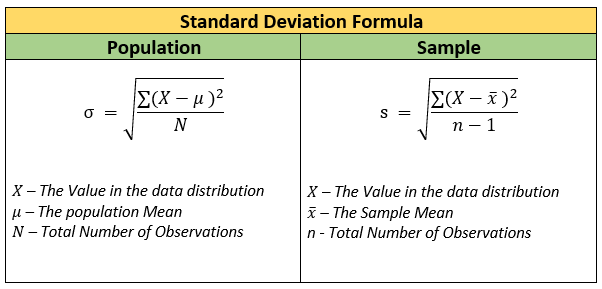  

But since they are a numpy array, we can just have numpy do it for us:

In [16]:
std_dev_a = population_a.std()
print(std_dev_a)

4.98901750417077


Now let's visualize what our distribution curve looks like

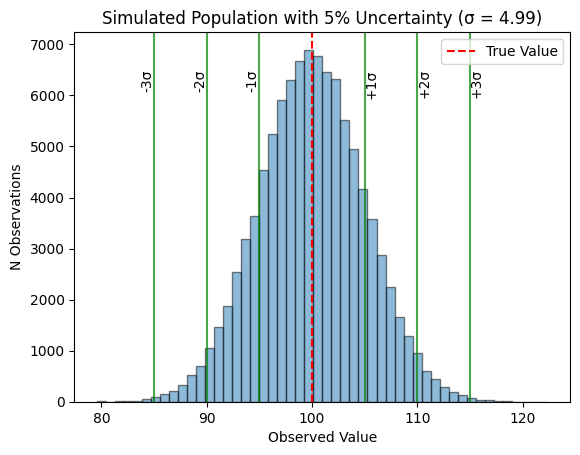

In [17]:
# Visualize
plt.hist(population_a, bins=50, alpha=0.5, edgecolor='black')
plt.axvline(true_value, color='red', linestyle='--', label='True Value')
# Add sigma lines
for sigma in range(1, 4):
    plt.axvline(true_value + sigma * std_dev_a, color='green', linestyle='-', alpha=0.7)
    plt.axvline(true_value - sigma * std_dev_a, color='green', linestyle='-', alpha=0.7)
    plt.text(true_value + sigma * std_dev_a, plt.ylim()[1]*0.9, f'+{sigma}σ', rotation=90, va='top', ha='left')
    plt.text(true_value - sigma * std_dev_a, plt.ylim()[1]*0.9, f'-{sigma}σ', rotation=90, va='top', ha='right')
plt.title(f"Simulated Population with 5% Uncertainty (σ = {std_dev_a:.2f})")
plt.xlabel("Observed Value")
plt.ylabel("N Observations")
plt.legend()
plt.show()

We'll create another random population:

In [18]:
population_b = np.random.normal(loc=true_value, scale=absolute_uncertainty, size=num_samples)
population_b

array([101.62370444, 102.40970187, 102.4563576 , ..., 100.6410875 ,
        99.96855044,  93.53269643], shape=(100000,))

And we can see that it has a very similar standard deviation:

In [19]:
std_dev_b = population_b.std()
print(std_dev_b)

4.985508464478848


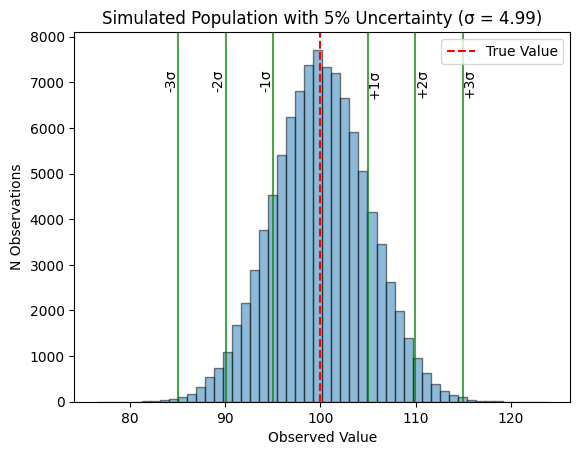

In [20]:
# Visualize
plt.hist(population_b, bins=50, alpha=0.5, edgecolor='black')
plt.axvline(true_value, color='red', linestyle='--', label='True Value')
# Add sigma lines
for sigma in range(1, 4):
    plt.axvline(true_value + sigma * std_dev_a, color='green', linestyle='-', alpha=0.7)
    plt.axvline(true_value - sigma * std_dev_a, color='green', linestyle='-', alpha=0.7)
    plt.text(true_value + sigma * std_dev_a, plt.ylim()[1]*0.9, f'+{sigma}σ', rotation=90, va='top', ha='left')
    plt.text(true_value - sigma * std_dev_a, plt.ylim()[1]*0.9, f'-{sigma}σ', rotation=90, va='top', ha='right')
plt.title(f"Simulated Population with 5% Uncertainty (σ = {std_dev_b:.2f})")
plt.xlabel("Observed Value")
plt.ylabel("N Observations")
plt.legend()
plt.show()

When you add two numpy arrays it performs an element-wise addition (each element with a matching position gets added together). This gives us a new array of equal size.

In [21]:
population_c = population_a + population_b
population_c

array([205.06053815, 196.40928526, 204.46835037, ..., 205.46819329,
       201.84261402, 208.35053751], shape=(100000,))

And we can see that when we ask numpy to calculate the standard deviation on the summed population, we get something very similar to taking the hypotnuse of the two.

In [22]:
std_dev_c = population_c.std()
print(std_dev_c)

7.041265010241557


In [23]:
hypot = math.sqrt( std_dev_a**2 + std_dev_b**2 )
print(hypot)

7.053055388008276


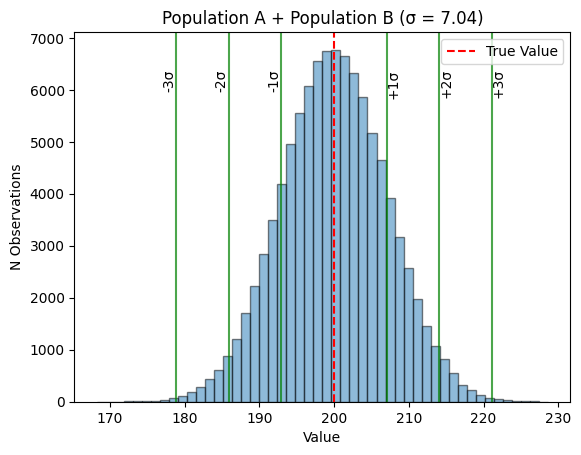

In [24]:
# Visualize
plt.hist(population_c, bins=50, alpha=0.5, edgecolor='black')
plt.axvline(true_value*2, color='red', linestyle='--', label='True Value')
# Add sigma lines
for sigma in range(1, 4):
    sigma_value_positive = true_value*2 + sigma * std_dev_c
    sigma_value_negative = true_value*2 - sigma * std_dev_c
    plt.axvline(sigma_value_positive, color='green', linestyle='-', alpha=0.7)
    plt.axvline(sigma_value_negative, color='green', linestyle='-', alpha=0.7)
    plt.text(sigma_value_positive, plt.ylim()[1]*0.9, f'+{sigma}σ', rotation=90, va='top', ha='left')
    plt.text(sigma_value_negative, plt.ylim()[1]*0.9, f'-{sigma}σ', rotation=90, va='top', ha='right')
plt.title(f"Population A + Population B (σ = {std_dev_c:.2f})")
plt.xlabel("Value")
plt.ylabel("N Observations")
plt.legend()
plt.show()